In [1]:
import numpy as np
import pandas as pd
from scipy.stats import t
from statsmodels.stats.weightstats import ttest_ind as t_test
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
data[['gender', 'race/ethnicity']].iloc[:5]

,gender,race/ethnicity
0,female,group B
1,female,group C
2,female,group B
3,male,group A
4,male,group C


In [18]:
data.iloc[0:5, 0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [24]:
data.loc[1:4, 'gender':'lunch']

,gender,race/ethnicity,parental level of education,lunch
1,female,group C,some college,standard
2,female,group B,master's degree,standard
3,male,group A,associate's degree,free/reduced
4,male,group C,some college,standard


In [43]:
data.iloc[:, 2:3]

,parental level of education
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college
...,...
995,master's degree
996,high school
997,high school
998,some college


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.shape

(1000, 8)

In [8]:
data.groupby('gender')['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [11]:
data.groupby('gender').aggregate({'math score': 'mean'})

,math score
gender,
female,63.633205
male,68.728216


In [44]:
data.size

8000

In [45]:
data.shape

(1000, 8)

In [51]:
data.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [59]:
data.select_dtypes(exclude=[int])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
titanic.shape

(891, 12)

In [68]:
titanic.columns.size

12

In [70]:
titanic.index.size

891

In [71]:
titanic.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [76]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.loc[data['gender'] == 'female',  ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [ ]:
stats.linear

In [4]:
class Dictkey():
    def __init__(self, name):
        self.name = name

In [5]:
dk = Dictkey('aaa')

In [44]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
total = data.lunch.count()
fr_red = data.lunch.value_counts()['free/reduced']

In [37]:
fr_red/total

0.355

In [43]:
(data.lunch == 'free/reduced').mean()

0.355

In [70]:
# free/reduced mean
data.loc[data.lunch == 'free/reduced', ['math score', 'reading score', 'writing score']].mean()

math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

In [63]:
# standard mean
data.loc[data.lunch == 'standard', ['math score', 'reading score', 'writing score']].mean()

math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

In [66]:
# compare mean
(data.loc[data.lunch == 'free/reduced', ['math score', 'reading score', 'writing score']].mean() >
 data.loc[data.lunch == 'standard', ['math score', 'reading score', 'writing score']].mean())

math score       False
reading score    False
writing score    False
dtype: bool

In [65]:
# free/reduced std
data.loc[data.lunch == 'free/reduced', ['math score', 'reading score', 'writing score']].std()

math score       15.159956
reading score    14.895339
writing score    15.433823
dtype: float64

In [74]:
# standard std
data.loc[data.lunch == 'standard', ['math score', 'reading score', 'writing score']].std()

math score       13.653501
reading score    13.830602
writing score    14.339487
dtype: float64

In [72]:
# compare std
(data.loc[data.lunch == 'free/reduced', ['math score', 'reading score', 'writing score']].std() >
 data.loc[data.lunch == 'standard', ['math score', 'reading score', 'writing score']].std())

math score       True
reading score    True
writing score    True
dtype: bool

In [77]:
data.loc[data.lunch == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [92]:
data.loc[data.lunch == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [100]:
data.columns = data.columns.str.replace(' ', '_')

In [101]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [109]:
x = 99.6
data.query('writing_score > @x')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


In [108]:
x = 99.6
data.query(f'writing_score > {x}')

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
685,female,group E,master's degree,standard,completed,94,99,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


In [113]:
student_stats = data.copy()

In [114]:
student_stats[student_stats['parental level of education'].isin(["bachelor's degree", "master's degree"])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


In [123]:
variants = ["bachelor's degree", "master's degree"]
data.query('`parental level of education` in @variants')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80
...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100
969,female,group B,bachelor's degree,standard,none,75,84,80
970,female,group D,bachelor's degree,standard,none,89,100,100
993,female,group D,bachelor's degree,free/reduced,none,62,72,74


In [4]:
students = data.rename(index={i: str(i)+chr(i) for i in data.index})

In [6]:
students.filter(regex='[a-z]$', axis=0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
97a,female,group E,some college,standard,completed,63,72,70
98b,female,group D,some college,free/reduced,none,58,67,62
99c,female,group D,bachelor's degree,standard,none,65,67,62
100d,male,group B,some college,standard,none,79,67,67
101e,male,group D,bachelor's degree,standard,completed,68,74,74
102f,female,group D,associate's degree,standard,none,85,91,89
103g,male,group B,high school,standard,completed,60,44,47
104h,male,group C,some college,standard,completed,98,86,90
105i,female,group C,some college,standard,none,58,67,72
106j,female,group D,master's degree,standard,none,87,100,100


# group by

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
data.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


## T-Test on male-female math score mean

In [3]:
data1 = data.groupby('gender').aggregate({'math score': ['mean', 'std', 'count']})
data1

math score                 
             mean        std count
gender                            
female  63.633205  15.491453   518
male    68.728216  14.356277   482

In [5]:
mean_f, std_f, count_f = data1.loc['female', ('math score')].values
mean_m, std_m, count_m = data1.loc['male', ('math score')].values

t_value = (mean_m - mean_f)/np.sqrt(std_m**2/count_m + std_f**2/count_f)

df = count_m + count_f - 2
alfa = 0.05
t_value, df, t.ppf(1 - alfa/2, df)

(5.398000564160737, 998.0, 1.9623438462163336)

In [16]:
fem = data.query('gender == "female"')['math score']
mal = data.query('gender == "male"')['math score']
t_test(mal, fem, usevar='unequal')

(5.398000564160736, 8.420838109090382e-08, 997.9840751727497)

In [73]:
t.ppf(1 - alfa/2, df)

1.9623438462163336

In [56]:
data2 = data.groupby('gender')[['math score', 'reading score', 'writing score']] \
.aggregate(['mean', 'median', 'std'])
data2

math score                   reading score                    \
             mean median        std          mean median        std   
gender                                                                
female  63.633205   65.0  15.491453     72.608108   73.0  14.378245   
male    68.728216   69.0  14.356277     65.473029   66.0  13.931832   

       writing score                    
                mean median        std  
gender                                  
female     72.467181   74.0  14.844842  
male       63.311203   64.0  14.113832

In [57]:
data2.loc[:, (slice(None), ["mean", "std"])]

math score            reading score            writing score           
             mean        std          mean        std          mean        std
gender                                                                        
female  63.633205  15.491453     72.608108  14.378245     72.467181  14.844842
male    68.728216  14.356277     65.473029  13.931832     63.311203  14.113832

# sort_values

In [17]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
data.sort_values(['gender', 'math score'], ascending=False) \
.groupby(['gender', 'lunch']).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
104,male,group C,some college,standard,completed,98,86,90
689,male,group E,some college,free/reduced,none,93,90,83
719,male,group E,associate's degree,free/reduced,completed,91,73,80
299,male,group D,associate's degree,free/reduced,none,90,87,75
873,male,group E,associate's degree,free/reduced,none,90,90,82


In [28]:
data.sort_values(0, axis=1)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [34]:
data['total score'] = data.filter(like='score').sum(axis=1)

In [35]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [37]:
data.sort_values('total score', ascending=False).head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297
712,female,group D,some college,standard,none,98,100,99,297
165,female,group C,bachelor's degree,standard,completed,96,100,100,296
625,male,group D,some college,standard,completed,100,97,99,296
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293


# Dota data

In [39]:
dota = pd.read_csv('./dota_hero_stats.csv')
dota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      117 non-null    int64 
 1   attack_type     117 non-null    object
 2   id              117 non-null    int64 
 3   legs            117 non-null    int64 
 4   localized_name  117 non-null    object
 5   name            117 non-null    object
 6   primary_attr    117 non-null    object
 7   roles           117 non-null    object
dtypes: int64(3), object(5)
memory usage: 7.4+ KB


In [40]:
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [43]:
dota.groupby('legs').describe()

Unnamed: 0                                                         id  \
          count       mean        std   min   25%   50%   75%    max count   
legs                                                                         
0          11.0  46.000000  32.227318   9.0  20.0  38.0  76.0   92.0  11.0   
2          95.0  58.789474  34.307091   0.0  29.5  58.0  86.5  116.0  95.0   
4           7.0  61.714286  31.721256   2.0  53.0  61.0  84.0   95.0   7.0   
6           3.0  68.000000  46.679760  15.0  50.5  86.0  94.5  103.0   3.0   
8           1.0  59.000000        NaN  59.0  59.0  59.0  59.0   59.0   1.0   

                                                           
           mean        std   min   25%   50%   75%    max  
legs                                                       
0     47.727273  32.554849  10.0  21.5  40.0  78.0   94.0  
2     60.842105  34.994928   1.0  31.5  60.0  88.5  129.0  
4     63.571429  32.035694   3.0  55.0  63.0  86.0   97.0  
6     69.666667  47.247575  16.0  52.0  88.0  96.5  105.0  
8     61.000000        NaN  61.0  61.0  61.0  61.0   61.0

In [45]:
dota.legs.value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [46]:
dota.unstack()

Unnamed: 0  0                                                      0
            1                                                      1
            2                                                      2
            3                                                      3
            4                                                      4
                                         ...                        
roles       112         ['Carry', 'Escape', 'Disabler', 'Initiator']
            113           ['Support', 'Nuker', 'Disabler', 'Escape']
            114    ['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc...
            115           ['Support', 'Nuker', 'Disabler', 'Escape']
            116        ['Carry', 'Initiator', 'Disabler', 'Durable']
Length: 936, dtype: object

In [56]:
dota.columns

Index(['Unnamed: 0', 'attack_type', 'id', 'legs', 'localized_name', 'name',
       'primary_attr', 'roles'],
      dtype='object')

In [59]:
dota.groupby(['attack_type', 'primary_attr']).count().sort_values('id', ascending=False)

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Ranged      int                   40  40    40              40    40     40
Melee       str                   35  35    35              35    35     35
            agi                   19  19    19              19    19     19
Ranged      agi                   18  18    18              18    18     18
            str                    3   3     3               3     3      3
Melee       int                    2   2     2               2     2      2

In [64]:
dota.groupby(['attack_type','primary_attr']).aggregate({'id':'count'}).sort_values('id').tail(1)

,,id
attack_type,primary_attr,
Ranged,int,40


# Loopa pupa

In [49]:
loopa = pd.read_csv('./accountancy.csv')
loopa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [55]:
loopa.groupby(['Executor', 'Type']).Salary.mean().unstack()

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


In [ ]:
loopa

# algae

In [68]:
algae = pd.read_csv('algae.csv')
algae.describe()

,sucrose,alanin,citrate,glucose,oleic_acid
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.098895,3.379068,4.603042,3.346347,3.054593
std,2.271190,2.400529,2.084948,1.094572,1.739319
min,0.704580,0.346431,1.071920,2.272724,0.304573
25%,2.589835,1.353551,3.563185,2.596385,2.292285
50%,3.569170,3.319066,5.413716,3.292899,2.678951
75%,6.476373,5.272747,5.786515,3.571159,3.965826
max,6.825467,6.881024,6.940588,6.013219,6.405165


In [69]:
algae

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [72]:
# algae.groupby('genus').aggregate({'sucrose': 'mean'})

In [74]:
algae.groupby('genus').mean()

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [80]:
algae.groupby('genus').alanin.describe()



,count,mean,std,min,25%,50%,75%,max
genus,,,,,,,,
Ascophyllum,1.0,0.875429,NaN,0.875429,0.875429,0.875429,0.875429,0.875429
Cladophora,3.0,3.997055,2.657050,1.648450,2.555071,3.461692,5.171358,6.881024
Fucus,3.0,3.566411,3.149943,0.346431,2.028965,3.711498,5.176401,6.641303
Palmaria,1.0,3.176440,NaN,3.176440,3.176440,3.176440,3.176440,3.176440
Saccharina,2.0,3.524207,3.208789,1.255251,2.389729,3.524207,4.658685,5.793163


In [83]:
np.around(algae.groupby('genus').alanin.describe().loc['Fucus', ['min', 'mean', 'max']].values, decimals=2)

array([0.35, 3.57, 6.64])

In [86]:
algae.groupby('group').describe().transpose()

group                brown     green       red
sucrose    count  6.000000  3.000000  1.000000
           mean   4.709666  4.008792  0.704580
           std    2.336471  1.634817       NaN
           min    1.636122  2.452623  0.704580
           25%    3.070321  3.157047  0.704580
           50%    5.003970  3.861470  0.704580
           75%    6.773014  4.786877  0.704580
           max    6.825467  5.712284  0.704580
alanin     count  6.000000  3.000000  1.000000
           mean   3.103846  3.997055  3.176440
           std    2.687071  2.657050       NaN
           min    0.346431  1.648450  3.176440
           25%    0.970384  2.555071  3.176440
           50%    2.483374  3.461692  3.176440
           75%    5.272747  5.171358  3.176440
           max    6.641303  6.881024  3.176440
citrate    count  6.000000  3.000000  1.000000
           mean   4.098597  5.288311  5.573905
           std    2.338577  1.987489       NaN
           min    1.071920  3.082826  5.573905
           25%    2.163641  4.462173  5.573905
           50%    5.128895  5.841520  5.573905
           75%    5.529506  6.391054  5.573905
           max    6.423606  6.940588  5.573905
glucose    count  6.000000  3.000000  1.000000
           mean   3.636759  2.800276  3.242090
           std    1.329570  0.516009       NaN
           min    2.272724  2.316955  3.242090
           25%    2.765084  2.528560  3.242090
           50%    3.519093  2.740165  3.242090
           75%    3.866782  3.041936  3.242090
           max    6.013219  3.343707  3.242090
oleic_acid count  6.000000  3.000000  1.000000
           mean   3.584995  2.263472  2.245538
           std    2.094095  0.735111       NaN
           min    0.304573  1.432514  2.245538
           25%    2.672695  1.980700  2.245538
           50%    3.774952  2.528886  2.245538
           75%    4.652528  2.678951  2.245538
           max    6.405165  2.829016  2.245538

In [91]:
np.round(algae.groupby('group').aggregate({'citrate': np.var}).values, decimals=2)

array([[5.47],
       [3.95],
       [ nan]])

In [93]:
np.round(algae.groupby('group').aggregate({'sucrose': np.ptp}).values, decimals=2)

array([[5.19],
       [3.26],
       [0.  ]])

In [96]:
np.round(algae.groupby('group').aggregate({'sucrose': 'count'}).values, decimals=2)

array([[6],
       [3],
       [1]], dtype=int64)

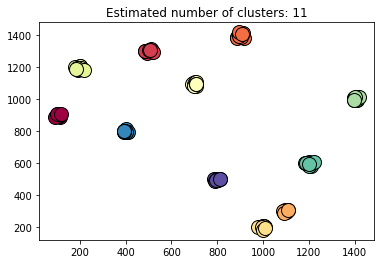

In [98]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

df = pd.read_csv('dataset_209770_6.txt', sep=' ')
X = df.values
Y = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.2, min_samples=5).fit(Y)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show();

# genome_matrix

In [128]:
genome = pd.read_csv('genome_matrix.csv', index_col=0)
genome.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


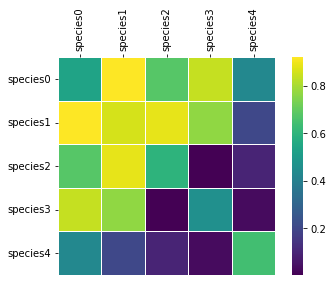

In [130]:
sns.heatmap(genome, 
            cmap='viridis',
            linewidths=1,
            linecolor='white',
           square=True)
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(rotation=90)

# dota again

In [140]:
dota
    

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [147]:
def stripp(x):
    return len(x.split(','))

dota['num_roles'] = dota.roles.apply(stripp)


In [151]:
dota['cnt'] = dota.roles.str.count(',') + 1
dota.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,num_roles,cnt
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3,3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4,4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4,4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5,5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4,4


array([[<AxesSubplot:title={'center':'num_roles'}>]], dtype=object)

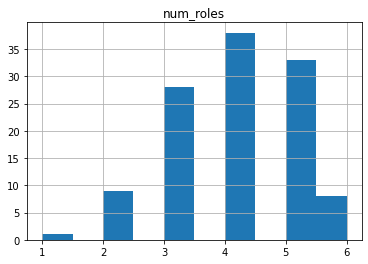

In [153]:
dota.hist('num_roles')

In [159]:
dota.groupby('num_roles').num_roles.count()

num_roles
1     1
2     9
3    28
4    38
5    33
6     8
Name: num_roles, dtype: int64

In [182]:
import requests

url = 'https://api.opendota.com/api/heroes'
r = requests.get(url)

data_fromjson = pd.read_json(r.text, orient='record')
data_fromjson.head()

# Ирисы

In [211]:
iris = pd.read_csv('iris.csv', index_col=0)
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


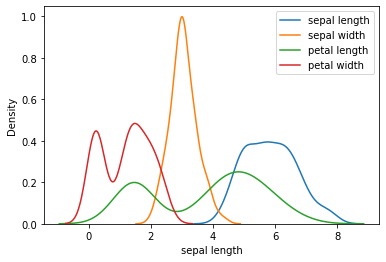

In [200]:
for column in iris.columns[:-1]:
    sns.kdeplot(iris[column], label=column)

plt.legend()

In [212]:
dat_iris = iris.copy()
dat_iris.drop(columns='species', inplace=True)
dat_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:ylabel='Density'>

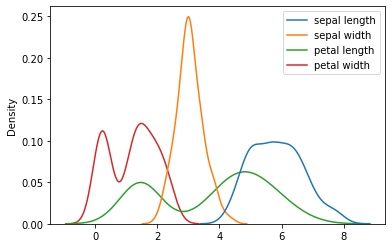

In [213]:
sns.kdeplot(data=dat_iris)

(-4.0, 9.0)

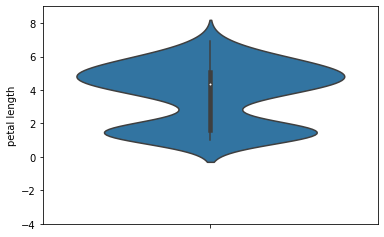

In [216]:
ax = sns.violinplot(y='petal length', data=iris)
ax.set_ylim([-4, 9])

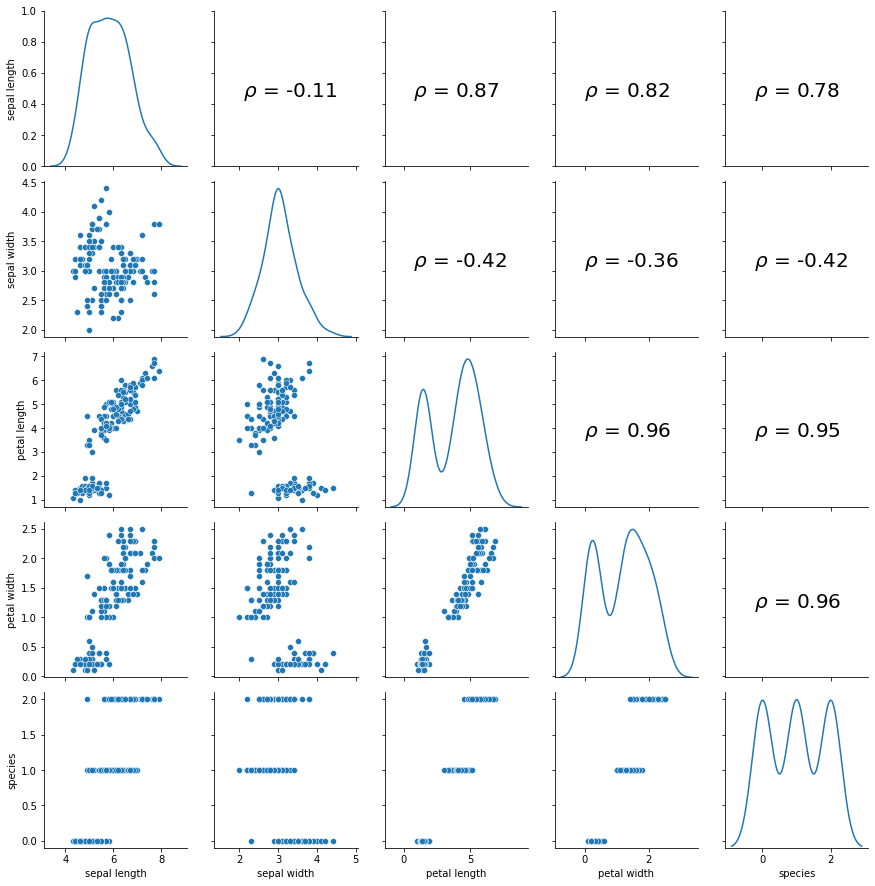

In [222]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.45), size=20, xycoords=ax.transAxes)

g = sns.PairGrid(data=iris, hue=None, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)


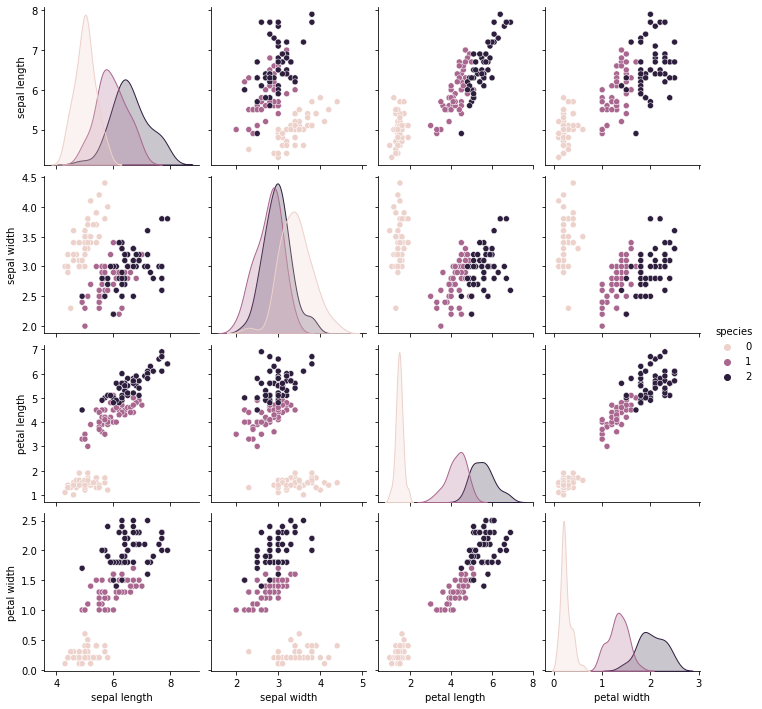

In [223]:
sns.pairplot(data=iris, hue='species')

In [224]:
'''
type value
A    10
A    14
B    12
B    23
'''
my_data = pd.DataFrame({'type': ['A', 'A', 'B', 'B'], 'value': [10, 14, 12, 23]})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


# Practice

In [225]:
my_stat = pd.read_csv('my_stat.csv')
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [226]:
subset_1 = my_stat.loc[:9, ['V1', 'V3']]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [227]:
subset_2 = my_stat.drop(index=[0, 4], columns=['V1', 'V3'])
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [230]:
subset_3 = my_stat.iloc[(lambda x: (x.index != 0) & (x.index != 4))(my_stat), [1, 3]]
subset_2 == subset_3

,V2,V4
1,True,True
2,True,True
3,True,True
5,True,True
6,True,True
...,...,...
495,True,True
496,True,True
497,True,True
498,True,True


In [232]:
subset_4 = my_stat.iloc[0:10,[0,2]]
subset_4

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [ ]:
'''
В переменную subset_1 сохраните только те наблюдения, 
у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, 
у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.
'''

In [238]:
subset_1 = my_stat.query('(V1 > 0) & (V3 == "A")')
subset_1

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [245]:
subset_2 = my_stat.query('(V2 != 10) | (V4 >= 1)')
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [247]:
np.log2(2)

1.0

In [253]:
my_stat['V5'] = my_stat.V4 + my_stat.V1

In [254]:
my_stat['V6'] = my_stat.V2.apply(np.log)

In [255]:
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


In [256]:
np.exp(2.564949)

12.999995353000852

In [257]:
import math

In [258]:
my_stat['V7'] = my_stat.V2.apply(math.log)

In [259]:
my_stat['V7']

0      2.564949
1      1.945910
2      2.397895
3      2.397895
4      2.302585
         ...   
495    2.079442
496    2.079442
497    2.397895
498    2.397895
499    2.079442
Name: V7, Length: 500, dtype: float64

In [260]:
# V1 -> session_value
# V2 -> group
# V3 -> time
# V4 -> n_users

my_stat.rename(columns={'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'})

,session_value,group,time,n_users,V5,V6,V7
0,2,13.0,B,1.0,3.0,2.564949,2.564949
1,-1,7.0,B,1.0,0.0,1.945910,1.945910
2,0,11.0,A,0.0,0.0,2.397895,2.397895
3,2,11.0,A,2.0,4.0,2.397895,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585,2.302585
...,...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442,2.079442
496,3,8.0,A,1.0,4.0,2.079442,2.079442
497,-1,11.0,B,2.0,1.0,2.397895,2.397895
498,1,11.0,A,2.0,3.0,2.397895,2.397895


In [280]:
my_stat1 = pd.read_csv('my_stat_1.csv')
my_stat1.head()

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9


In [282]:
mask = my_stat1.n_users > 0
median_n_users = my_stat1.loc[mask ,'n_users'].median()
my_stat1.loc[~mask, 'n_users'] = median_n_users
my_stat1['session_value'] = my_stat1['session_value'].fillna(0)
my_stat1

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


In [2]:
my_stat = pd.read_csv('my_stat_1.csv')
mean_session_value_data = my_stat.groupby('group', as_index=False) \
.session_value.mean() \
.rename(columns={'session_value': 'mean_session_value'})
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0


In [303]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [6]:
my_stat.groupby('group', as_index=False).agg(mean_session_value=('session_value', 'mean'))

,mean_session_value
group,
A,1.0
B,1.0


In [11]:
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [10]:
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0


In [12]:
mean_session_value_data.set_index('group').join(my_stat.set_index('group'))

,mean_session_value,session_value,time,n_users
group,,,,
A,1.0,NaN,11,-1
A,1.0,1.0,8,1
A,1.0,3.0,8,8
A,1.0,0.0,9,4
A,1.0,0.0,9,-20
B,1.0,0.0,12,9
B,1.0,2.0,9,3
B,1.0,2.0,10,9
B,1.0,NaN,11,5


In [14]:
my_stat.merge(mean_session_value_data, on='group')

,session_value,time,group,n_users,mean_session_value
0,0.0,12,B,9,1.0
1,2.0,9,B,3,1.0
2,2.0,10,B,9,1.0
3,NaN,11,B,5,1.0
4,0.0,8,B,-11,1.0
5,NaN,11,A,-1,1.0
6,1.0,8,A,1,1.0
7,3.0,8,A,8,1.0
8,0.0,9,A,4,1.0
9,0.0,9,A,-20,1.0


In [15]:
mean_session_value_data = my_stat.groupby('group').agg({'session_value': 'mean'}).reset_index()
mean_session_value_data.columns = [['group','mean_session_value']]

In [16]:
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0


In [18]:
mean_session_value_data = my_stat.groupby('group', as_index=False) \
    .aggregate({'session_value':'mean'}) \
    .rename(columns={'session_value':'mean_session_value'})

In [19]:
mean_session_value_data

,group,mean_session_value
0,A,1.0
1,B,1.0
